In [1]:
from sklearn.ensemble import RandomForestRegressor
import custom_funcs as cf

/Users/ericmjl/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
drugs = ['FPV', 'ATV', 'IDV', 'LPV', 'NFV', 'SQV', 'TPV', 'DRV',]
drug = drugs[0]
protein = 'protease'

data, feat_cols = cf.get_cleaned_data(protein, drug)

# Just checking:
cf.test_data_integrity(data)

## Now, let's do data transformations.
data_numeric = cf.to_numeric_rep(data, feat_cols, rep='pKa')

# Finally, split the data into a training set, and test set.
X, Y, X_train, X_test, Y_train, Y_test = cf.to_train_test_split(data_numeric, feat_cols, drug, test_size=0.3)
# sscv = ShuffleSplit(n=len(X_train), n_iter=3, test_size=0.3)

In [11]:
Y_train

array([-0.39794001,  0.        , -0.39794001,  0.74036269,  0.69019608,
        0.25527251, -0.22184875,  1.62838893, -0.39794001, -0.04575749,
       -0.09691001,  1.36172784,  2.16435286, -0.04575749,  1.49136169,
        0.63346846,  0.44715803, -0.04575749, -0.09691001,  0.66275783,
       -0.09691001,  0.04139269, -0.39794001,  0.14612804, -1.        ,
        1.74036269, -0.69897   ,  0.59106461, -0.22184875, -1.        ,
       -0.09691001, -0.22184875, -0.09691001,  1.53147892,  1.21748394,
        0.        ,  0.95424251,  0.14612804,  1.25527251, -1.        ,
        1.14612804,  0.36172784, -0.39794001,  0.61278386, -0.69897   ,
        0.14612804,  0.11394335, -0.09691001,  1.07918125, -0.04575749,
        0.        , -0.30103   ,  2.47712125,  0.74818803,  0.462398  ,
        2.60205999,  1.04139269, -0.09691001,  0.67209786, -0.22184875,
        1.69897   , -0.04575749,  0.77815125,  1.17609126,  1.74036269,
       -0.15490196, -0.39794001,  0.63346846,  0.62324929, -0.30

In [7]:
len(data_numeric)

726

In [12]:
rfr = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [14]:
preds = rfr.predict(X_test)
preds[0:5]

array([-0.09897597, -0.05205581, -0.16369835, -0.43073883, -0.23877284])

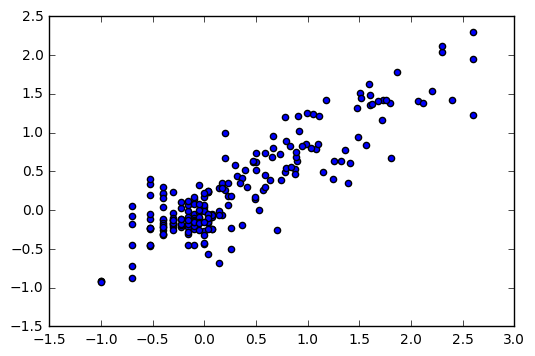

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, preds)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(Y_test, preds)

0.77801483028757112

In [19]:
mean_squared_error(Y_test, preds)

0.12882769201611294

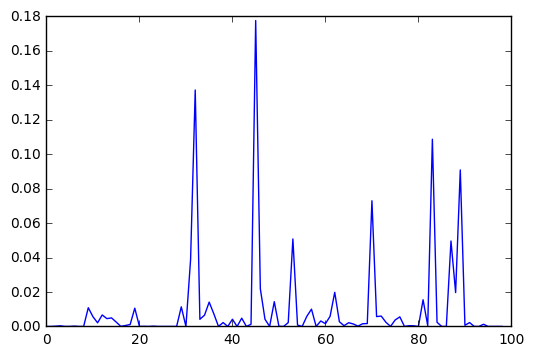

In [21]:
plt.plot(rfr.feature_importances_)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
preds = lr.predict(X_test)

In [24]:
r2_score(Y_test, preds)

-9.9965134839271929e+20

In [25]:
mean_squared_error(Y_test, preds)

5.8014134998775425e+20

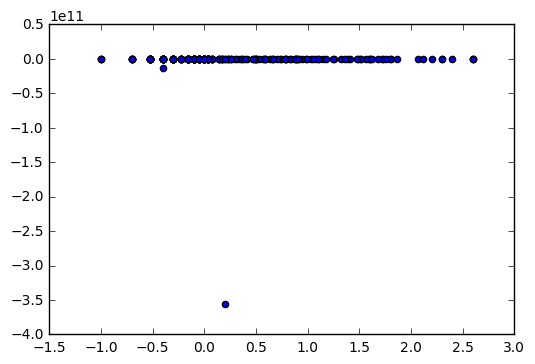

In [26]:
plt.scatter(Y_test, preds)

In [29]:
min(preds)

-355396585786.35938

In [31]:
list(preds).index(min(preds))

193

In [33]:
preds_list = list(preds)
del preds_list[193]

In [34]:
Y_test_list = list(Y_test)
del Y_test_list[193]

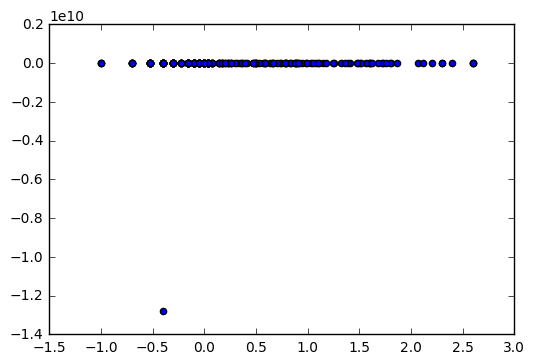

In [35]:
plt.scatter(Y_test_list, preds_list, )

In [36]:
from sklearn.feature_selection import RFE

In [39]:
selector = RFE(rfr, n_features_to_select=10, step=1)
selector.fit(X_train, Y_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [40]:
preds = selector.predict(X_test)

In [42]:
mean_squared_error(preds, Y_test)

0.14492404625652955